In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib
import matplotlib.pyplot as plt
from datetime import *

<h2> Series </h2>

In [5]:
s1 = Series([1,2,3,4])
s1

0    1
1    2
2    3
3    4
dtype: int64

In [9]:
s2 = Series(s1.values,index=['a','b','c','d'])
s2

a    1
b    2
c    3
d    4
dtype: int64

In [11]:
s2.values

array([1, 2, 3, 4], dtype=int64)

In [13]:
s2.index

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [15]:
s2['a']

1

In [17]:
s2['b'] = 12
s2

a     1
b    12
c     3
d     4
dtype: int64

In [19]:
s2[s2%2==0]

b    12
d     4
dtype: int64

In [21]:
s2*s2

a      1
b    144
c      9
d     16
dtype: int64

In [23]:
s2*(s2.T)

a      1
b    144
c      9
d     16
dtype: int64

In [25]:
'd' in s2

True

<h5> Can be created from dict </h5>

In [3]:
data_dict = {'math':97,'cs':95,'ml':93,'data_an':99}
ps = Series(data_dict)
ps


cs         95
data_an    99
math       97
ml         93
dtype: int64

In [4]:
subs = ['math','ml','data_an','python']
ps2 = Series(ps,index=subs)
ps2


math       97
ml         93
data_an    99
python    NaN
dtype: float64

In [39]:
ps2.isnull()

math       False
ml         False
data_an    False
python      True
dtype: bool

In [41]:
ps2.notnull()

math        True
ml          True
data_an     True
python     False
dtype: bool

<h4> this feature is called Data Alignment </h4>

In [43]:
ps+ps2

cs         NaN
data_an    198
math       194
ml         186
python     NaN
dtype: float64

In [45]:
ps2.name = 'marklist'
ps2.index.name = 'subjects'
ps2

subjects
math       97
ml         93
data_an    99
python    NaN
Name: marklist, dtype: float64

<h2> DataFrame </h2>

In [239]:
data = { 'name':['gautham','naveen','anand','giri','hacker'],
           'subs':(subs+['android']),'marks':(data_dict.values()+[99])}

In [240]:
df = DataFrame(data)
df

,marks,name,subs
0,95,gautham,math
1,93,naveen,ml
2,99,anand,data_an
3,97,giri,python
4,99,hacker,android


In [241]:
df = DataFrame(data,columns=['name','subs','marks'],index = range(312212205001,312212205006))
df

,name,subs,marks
312212205001,gautham,math,95
312212205002,naveen,ml,93
312212205003,anand,data_an,99
312212205004,giri,python,97
312212205005,hacker,android,99


In [242]:
df = DataFrame(data,columns=['name','subs','marks','company'],index = range(312212205001,312212205006))
df

,name,subs,marks,company
312212205001,gautham,math,95,NaN
312212205002,naveen,ml,93,NaN
312212205003,anand,data_an,99,NaN
312212205004,giri,python,97,NaN
312212205005,hacker,android,99,NaN


In [243]:
df['name']


312212205001    gautham
312212205002     naveen
312212205003      anand
312212205004       giri
312212205005     hacker
Name: name, dtype: object

In [244]:
df.subs

312212205001       math
312212205002         ml
312212205003    data_an
312212205004     python
312212205005    android
Name: subs, dtype: object

In [245]:
df.ix[312212205002]

name       naveen
subs           ml
marks          93
company       NaN
Name: 312212205002, dtype: object

In [246]:
df.company = Series({312212205001:'SAP',312212205005:'delloitte',312212205004:'Dell',
              312212205002:'JustPay',312212205003:'SAP'})
df

,name,subs,marks,company
312212205001,gautham,math,95,SAP
312212205002,naveen,ml,93,JustPay
312212205003,anand,data_an,99,SAP
312212205004,giri,python,97,Dell
312212205005,hacker,android,99,delloitte


In [42]:
df['management'] = df.company=='delloitte'
df

,name,subs,marks,company,management
312212205001,gautham,math,95,SAP,False
312212205002,naveen,ml,93,JustPay,False
312212205003,anand,data_an,99,SAP,False
312212205004,giri,python,97,Dell,False
312212205005,hacker,android,99,delloitte,True


In [44]:
list(df.columns[1:])

['subs', 'marks', 'company', 'management']

In [47]:
df.columns = ['pname']+list(df.columns[1:])
df

,pname,subs,marks,company,management
312212205001,gautham,math,95,SAP,False
312212205002,naveen,ml,93,JustPay,False
312212205003,anand,data_an,99,SAP,False
312212205004,giri,python,97,Dell,False
312212205005,hacker,android,99,delloitte,True


In [49]:
df.name = 'bangalore times'
df

,pname,subs,marks,company,management
312212205001,gautham,math,95,SAP,False
312212205002,naveen,ml,93,JustPay,False
312212205003,anand,data_an,99,SAP,False
312212205004,giri,python,97,Dell,False
312212205005,hacker,android,99,delloitte,True


In [53]:
df.T

,312212205001,312212205002,312212205003,312212205004,312212205005
pname,gautham,naveen,anand,giri,hacker
subs,math,ml,data_an,python,android
marks,95,93,99,97,99
company,SAP,JustPay,SAP,Dell,delloitte


In [55]:
#using nested dicts to create dataframe

df2 = DataFrame({'emp_id':{'e1':'e1','e2':'e2'}, 'job':{'e1':'dev','e2':'mang','e3':'market'}})
df2

,emp_id,job
e1,e1,dev
e2,e2,mang
e3,NaN,market


In [57]:
df.columns.name = 'emp_attributes'
df.index.name = 'roll_no'
df

emp_attributes,pname,subs,marks,company
roll_no,,,,
312212205001,gautham,math,95,SAP
312212205002,naveen,ml,93,JustPay
312212205003,anand,data_an,99,SAP
312212205004,giri,python,97,Dell
312212205005,hacker,android,99,delloitte


In [59]:
df.values

array([['gautham', 'math', 95L, 'SAP'],
       ['naveen', 'ml', 93L, 'JustPay'],
       ['anand', 'data_an', 99L, 'SAP'],
       ['giri', 'python', 97L, 'Dell'],
       ['hacker', 'android', 99L, 'delloitte']], dtype=object)

<h3> Index Objects </h3>

<h5> Index objects are immutable, so same index can be shared among the dataframes</h5>

In [62]:
df_in = df.index
df_in

Int64Index([312212205001, 312212205002, 312212205003, 312212205004,
            312212205005],
           dtype='int64', name=u'roll_no')

In [67]:
df.shape

(5, 4)

In [69]:
df2.index = df_in[:df2.shape[0]]
df2

,emp_id,job
roll_no,,
312212205001,e1,dev
312212205002,e2,mang
312212205003,NaN,market


In [71]:
312212205029 in df_in

False

<h4> Index Functions </h4>
<h5>append</h5> Concatenate with additional Index objects, producing a new Index
<h5>diff</h5> Compute set difference as an Index
<h5>intersection</h5> Compute set intersection
<h5>union</h5> Compute set union
<h5>isin</h5> Compute boolean array indicating whether each value is contained in the passed collection
<h5>delete</h5> Compute new Index with element at index i deleted
<h5>drop</h5> Compute new index by deleting passed values
<h5>insert</h5> Compute new Index by inserting element at index i
<h5>is_monotonic</h5> Returns True if each element is greater than or equal to the previous element
<h5>is_unique</h5> Returns True if the Index has no duplicate values
<h5>unique</h5> Compute the array of unique values in the Index

<h3> Essential Functionality </h3>

<h5> Reindexing Series</h5>

In [78]:
marks = df.marks
marks

roll_no
312212205001    95
312212205002    93
312212205003    99
312212205004    97
312212205005    99
Name: marks, dtype: int64

In [79]:
marks.mean()

96.599999999999994

In [80]:
marks2 = marks.reindex(range(312212204998,312212205010),fill_value = marks.mean()) #creates a new series
marks2

roll_no
312212204998    96.6
312212204999    96.6
312212205000    96.6
312212205001    95.0
312212205002    93.0
312212205003    99.0
312212205004    97.0
312212205005    99.0
312212205006    96.6
312212205007    96.6
312212205008    96.6
312212205009    96.6
Name: marks, dtype: float64

In [82]:
#fill values with methods
colors = Series(['blue','red','green'],index=[0,2,4])
colors

0     blue
2      red
4    green
dtype: object

In [87]:
colors2 = colors.reindex(range(0,6),method='ffill')
colors2

0     blue
1     blue
2      red
3      red
4    green
5    green
dtype: object

In [89]:
colors3 = colors.reindex(range(0,6),method='bfill')
colors3

0     blue
1      red
2      red
3    green
4    green
5      NaN
dtype: object

<h5> Reindexing DataFrames </h5>

In [102]:
df4 = DataFrame(np.random.randn(3,3),index=[0,2,10],columns=['gautham','kmba','cm'])
df4

,gautham,kmba,cm
0,-1.387996,-0.504300,0.050376
2,-0.443651,-1.540503,0.087504
10,-0.111694,-1.348040,-0.957219


In [107]:
df5 = df4.reindex(range(11),method='nearest',limit=3,columns=['gautham','kmba','cm'])
df5

,gautham,kmba,cm
0,-1.387996,-0.504300,0.050376
1,-0.443651,-1.540503,0.087504
2,-0.443651,-1.540503,0.087504
3,-0.443651,-1.540503,0.087504
4,-0.443651,-1.540503,0.087504
5,-0.443651,-1.540503,0.087504
6,NaN,NaN,NaN
7,-0.111694,-1.348040,-0.957219
8,-0.111694,-1.348040,-0.957219
9,-0.111694,-1.348040,-0.957219


In [111]:
df6 = df4.reindex(range(11),method='nearest',columns=['gautham','anand','kmba','cm'],fill_value=np.random.randn())
df6

,gautham,anand,kmba,cm
0,-1.387996,0.681671,-0.504300,0.050376
1,-0.443651,0.681671,-1.540503,0.087504
2,-0.443651,0.681671,-1.540503,0.087504
3,-0.443651,0.681671,-1.540503,0.087504
4,-0.443651,0.681671,-1.540503,0.087504
5,-0.443651,0.681671,-1.540503,0.087504
6,-0.111694,0.681671,-1.348040,-0.957219
7,-0.111694,0.681671,-1.348040,-0.957219
8,-0.111694,0.681671,-1.348040,-0.957219
9,-0.111694,0.681671,-1.348040,-0.957219


In [122]:
obj = df6['gautham'].drop([0,1])
obj


2    -0.443651
3    -0.443651
4    -0.443651
5    -0.443651
6    -0.111694
7    -0.111694
8    -0.111694
9    -0.111694
10   -0.111694
Name: gautham, dtype: float64

In [127]:
df6.drop(['gautham','anand'],axis=1)

,kmba,cm
0,-0.504300,0.050376
1,-1.540503,0.087504
2,-1.540503,0.087504
3,-1.540503,0.087504
4,-1.540503,0.087504
5,-1.540503,0.087504
6,-1.348040,-0.957219
7,-1.348040,-0.957219
8,-1.348040,-0.957219
9,-1.348040,-0.957219


In [129]:
df6.drop(range(0,5,2),axis=0)

,gautham,anand,kmba,cm
1,-0.443651,0.681671,-1.540503,0.087504
3,-0.443651,0.681671,-1.540503,0.087504
5,-0.443651,0.681671,-1.540503,0.087504
6,-0.111694,0.681671,-1.348040,-0.957219
7,-0.111694,0.681671,-1.348040,-0.957219
8,-0.111694,0.681671,-1.348040,-0.957219
9,-0.111694,0.681671,-1.348040,-0.957219
10,-0.111694,0.681671,-1.348040,-0.957219


<h4> Indexing Filtering </h4>

In [133]:
sobj = df6['cm']
sobj[1:]

1     0.087504
2     0.087504
3     0.087504
4     0.087504
5     0.087504
6    -0.957219
7    -0.957219
8    -0.957219
9    -0.957219
10   -0.957219
Name: cm, dtype: float64

In [138]:
sobj[1:10:2]

1    0.087504
3    0.087504
5    0.087504
7   -0.957219
9   -0.957219
Name: cm, dtype: float64

In [142]:
dir(Series)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__int__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__'

In [144]:
sobj.apply(lambda x: int(x*100)%2)

0     1
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    1
Name: cm, dtype: int64

In [147]:
sobj[sobj.apply(lambda x: int(x*100)%2)==0]

1    0.087504
2    0.087504
3    0.087504
4    0.087504
5    0.087504
Name: cm, dtype: float64

In [152]:
df6.T['gautham':'kmba']

,0,1,2,3,4,5,6,7,8,9,10
gautham,-1.387996,-0.443651,-0.443651,-0.443651,-0.443651,-0.443651,-0.111694,-0.111694,-0.111694,-0.111694,-0.111694
anand,0.681671,0.681671,0.681671,0.681671,0.681671,0.681671,0.681671,0.681671,0.681671,0.681671,0.681671
kmba,-0.504300,-1.540503,-1.540503,-1.540503,-1.540503,-1.540503,-1.348040,-1.348040,-1.348040,-1.348040,-1.348040


In [194]:
df

emp_attributes,pname,subs,marks,company
roll_no,,,,
312212205001,gautham,math,95,SAP
312212205002,naveen,ml,93,JustPay
312212205003,anand,data_an,99,SAP
312212205004,giri,python,97,Dell
312212205005,hacker,android,99,delloitte


In [237]:
dftest = df.copy()
dftest['marks'] = 20
dftest

emp_attributes,pname,subs,marks,company
roll_no,,,,
312212205001,gautham,math,20,SAP
312212205002,naveen,ml,20,JustPay
312212205003,anand,data_an,20,SAP
312212205004,giri,python,20,Dell
312212205005,hacker,android,20,delloitte


In [236]:
so = dftest['marks']
so[:] = 10
dftest

c:\python27\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


emp_attributes,pname,subs,marks,company
roll_no,,,,
312212205001,gautham,math,10,SAP
312212205002,naveen,ml,10,JustPay
312212205003,anand,data_an,10,SAP
312212205004,giri,python,10,Dell
312212205005,hacker,android,10,delloitte


In [247]:
df

,name,subs,marks,company
312212205001,gautham,math,95,SAP
312212205002,naveen,ml,93,JustPay
312212205003,anand,data_an,99,SAP
312212205004,giri,python,97,Dell
312212205005,hacker,android,99,delloitte


<h4> ix() </h4>

In [255]:
df.ix[312212205002]

name        naveen
subs            ml
marks           93
company    JustPay
Name: 312212205002, dtype: object

In [266]:
df = df.rename(index=dict(zip(range(312212205001,312212205006),range(5001,5006))))
df

,name,subs,marks,company
5001,gautham,math,95,SAP
5002,naveen,ml,93,JustPay
5003,anand,data_an,99,SAP
5004,giri,python,97,Dell
5005,hacker,android,99,delloitte


In [269]:
df.ix[range(5004,5000,-2),['name','company']]

,name,company
5004,giri,Dell
5002,naveen,JustPay


In [271]:
df.ix[:5003,:'marks']

,name,subs,marks
5001,gautham,math,95
5002,naveen,ml,93
5003,anand,data_an,99


In [275]:
df.ix[df['marks']>=95]

,name,subs,marks,company
5001,gautham,math,95,SAP
5003,anand,data_an,99,SAP
5004,giri,python,97,Dell
5005,hacker,android,99,delloitte


<h3> different ways to index </h3>

<b>obj[val]</b> Select single column or sequence of columns from the DataFrame. Special case conveniences:
boolean array (filter rows), slice (slice rows), or boolean DataFrame (set
values based on some criterion).
<br>
<b>obj.ix[val]</b> Selects single row of subset of rows from the DataFrame.<br>
<b>obj.ix[:, val]</b> Selects single column of subset of columns.<br>
<b>obj.ix[val1, val2]</b> Select both rows and columns.<br>
<b>reindex</b> method Conform one or more axes to new indexes.<br>
<b>xs</b> method Select single row or column as a Series by label.<br>
<b>icol, irow</b> methods Select single column or row, respectively, as a Series by integer location.<br>
<b>get_value, set_value</b> methods Select single value by row and column label.<br>

<h3> Arithemetic and data alignment </h3>


In [286]:
dfa1 = DataFrame(np.arange(12).reshape(4,3),columns=range(2000,2003),index=['tn','ke','ap','mp'])
dfa2 = DataFrame(np.arange(16).reshape(4,4),columns=range(2001,2005),index=['tn','kar','ap','dl'])

In [287]:
dfa1

,2000,2001,2002
tn,0,1,2
ke,3,4,5
ap,6,7,8
mp,9,10,11


In [295]:
dfa2

,2001,2002,2003,2004
tn,0,1,2,3
kar,4,5,6,7
ap,8,9,10,11
dl,12,13,14,15


In [292]:
dfa1+dfa2

,2000,2001,2002,2003,2004
ap,NaN,15,17,NaN,NaN
dl,NaN,NaN,NaN,NaN,NaN
kar,NaN,NaN,NaN,NaN,NaN
ke,NaN,NaN,NaN,NaN,NaN
mp,NaN,NaN,NaN,NaN,NaN
tn,NaN,1,3,NaN,NaN


<h4> The available arithematic fns are add, sub, mul, div </h4>

In [299]:
dfa1.add(dfa2,fill_value=0)

,2000,2001,2002,2003,2004
ap,6,15,17,10,11
dl,NaN,12,13,14,15
kar,NaN,4,5,6,7
ke,3,4,5,NaN,NaN
mp,9,10,11,NaN,NaN
tn,0,1,3,2,3


In [300]:
dfa2.add(dfa1,fill_value=0)

,2000,2001,2002,2003,2004
ap,6,15,17,10,11
dl,NaN,12,13,14,15
kar,NaN,4,5,6,7
ke,3,4,5,NaN,NaN
mp,9,10,11,NaN,NaN
tn,0,1,3,2,3


In [303]:
dfa1.mul(dfa2,fill_value=1)

,2000,2001,2002,2003,2004
ap,6,56,72,10,11
dl,NaN,12,13,14,15
kar,NaN,4,5,6,7
ke,3,4,5,NaN,NaN
mp,9,10,11,NaN,NaN
tn,0,0,2,2,3


In [305]:
dfa2.div(dfa1,fill_value=1)

,2000,2001,2002,2003,2004
ap,0.166667,1.142857,1.125000,10,11
dl,NaN,12.000000,13.000000,14,15
kar,NaN,4.000000,5.000000,6,7
ke,0.333333,0.250000,0.200000,NaN,NaN
mp,0.111111,0.100000,0.090909,NaN,NaN
tn,inf,0.000000,0.500000,2,3


<h4> operations between dtaframes and series </h4>

<p> by default the series index is matched or unioned with the column names </p>


In [309]:
s1 = dfa2.ix[2]
s1

2001     8
2002     9
2003    10
2004    11
Name: ap, dtype: int32

In [311]:
dfa1 + s1

,2000,2001,2002,2003,2004
tn,NaN,9,11,NaN,NaN
ke,NaN,12,14,NaN,NaN
ap,NaN,15,17,NaN,NaN
mp,NaN,18,20,NaN,NaN


In [313]:
dfa1.add(s1,axis=1)

,2000,2001,2002,2003,2004
tn,NaN,9,11,NaN,NaN
ke,NaN,12,14,NaN,NaN
ap,NaN,15,17,NaN,NaN
mp,NaN,18,20,NaN,NaN


In [320]:
s2 = dfa2[2003]
s2

tn      2
kar     6
ap     10
dl     14
Name: 2003, dtype: int32

In [324]:
dfa1.add(s2,axis = 0)

,2000,2001,2002
ap,16,17,18
dl,NaN,NaN,NaN
kar,NaN,NaN,NaN
ke,NaN,NaN,NaN
mp,NaN,NaN,NaN
tn,2,3,4


<h4> Apply and Applymap </h4>

In [326]:
dfa1

,2000,2001,2002
tn,0,1,2
ke,3,4,5
ap,6,7,8
mp,9,10,11


In [330]:
dfa1.sum(axis=1)

tn     3
ke    12
ap    21
mp    30
dtype: int64

In [333]:
def stats(x):
    return Series({'min':min(x),'max':max(x),'sum':x.sum(),'mean':x.mean()})

dfa1.apply(stats,axis=0)

,2000,2001,2002
max,9.0,10.0,11.0
mean,4.5,5.5,6.5
min,0.0,1.0,2.0
sum,18.0,22.0,26.0


In [337]:
dfa1.apply(stats,axis=1)

,max,mean,min,sum
tn,2,1,0,3
ke,5,4,3,12
ap,8,7,6,21
mp,11,10,9,30


In [339]:
dfa1.applymap(lambda x: x**2)

,2000,2001,2002
tn,0,1,4
ke,9,16,25
ap,36,49,64
mp,81,100,121


<h3> sorting and ranking </h3>

In [342]:
dfa1.sort_index()

,2000,2001,2002
ap,6,7,8
ke,3,4,5
mp,9,10,11
tn,0,1,2


In [344]:
dfa1.sort_index(axis=1,ascending=False)

,2002,2001,2000
tn,2,1,0
ke,5,4,3
ap,8,7,6
mp,11,10,9


In [350]:
dfa1.sort_index(axis=0)

,2000,2001,2002
ap,6,7,8
ke,3,4,5
mp,9,10,11
tn,0,1,2


In [351]:
dfa1.sort_index(axis=1)

,2000,2001,2002
tn,0,1,2
ke,3,4,5
ap,6,7,8
mp,9,10,11


In [359]:
dfa1[2000].sort_values(ascending=False)

mp    9
ap    6
ke    3
tn    0
Name: 2000, dtype: int32

In [367]:
dfa1.sort_values(by=[2000,2001],ascending=False)

,2000,2001,2002
mp,9,10,11
ap,6,7,8
ke,3,4,5
tn,0,1,2


<h3> rank() outputs the indirect sort index of a column or row </h3>

In [368]:
st = Series([5,-1,2,4,2,-1,7,9,-5])

In [370]:
st.rank()

0    7.0
1    2.5
2    4.5
3    6.0
4    4.5
5    2.5
6    8.0
7    9.0
8    1.0
dtype: float64

In [372]:
st.rank(method='average')

0    7.0
1    2.5
2    4.5
3    6.0
4    4.5
5    2.5
6    8.0
7    9.0
8    1.0
dtype: float64

In [374]:
st.rank(method='min')

0    7
1    2
2    4
3    6
4    4
5    2
6    8
7    9
8    1
dtype: float64

In [376]:
st.rank(method='first')

0    7
1    2
2    4
3    6
4    5
5    3
6    8
7    9
8    1
dtype: float64

In [15]:
dfa_rank = DataFrame(np.array([-2,3,1,3,2,-10,7,7,4,-2,5,-1]).reshape(4,3),columns=list('abc'))
dfa_rank

,a,b,c
0,-2,3,1
1,3,2,-10
2,7,7,4
3,-2,5,-1


In [382]:
dfa_rank.rank(axis=0)

,a,b,c
0,1.5,2,3
1,3.0,1,1
2,4.0,4,4
3,1.5,3,2


In [384]:
dfa_rank.rank(axis=1,method='max')

,a,b,c
0,1,3,2
1,3,2,1
2,3,3,1
3,1,3,2


<h3> Summaizing and descriptive statistics </h3>
<p> Automatically handles NA </p>

In [4]:
df_stat = DataFrame([[0.8,np.nan],[np.nan,np.nan],[2,4.5],[np.nan,-10]],index=range(1,5),columns=['one','two'])
df_stat

,one,two
1,0.8,NaN
2,NaN,NaN
3,2.0,4.5
4,NaN,-10.0


In [5]:
df_stat.sum()

one    2.8
two   -5.5
dtype: float64

In [6]:
df_stat.sum(axis=1)

1     0.8
2     NaN
3     6.5
4   -10.0
dtype: float64

In [7]:
df_stat.sum(axis=1,skipna=False)

1    NaN
2    NaN
3    6.5
4    NaN
dtype: float64

In [8]:
df_stat.idxmin()

one    1
two    4
dtype: int64

In [9]:
df_stat.idxmax(axis=1)

1    one
2    NaN
3    two
4    two
dtype: object

In [10]:
df_stat.cumsum()

,one,two
1,0.8,NaN
2,NaN,NaN
3,2.8,4.5
4,NaN,-5.5


In [11]:
df_stat.cumsum(axis=1)

,one,two
1,0.8,NaN
2,NaN,NaN
3,2.0,6.5
4,NaN,-10.0


In [12]:
df_stat.describe()

,one,two
count,2.000000,2.000000
mean,1.400000,-2.750000
std,0.848528,10.253048
min,0.800000,-10.000000
25%,1.100000,-6.375000
50%,1.400000,-2.750000
75%,1.700000,0.875000
max,2.000000,4.500000


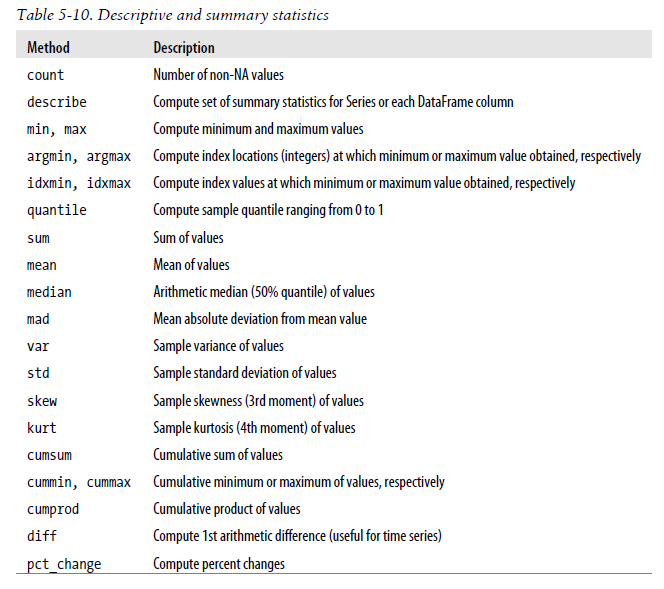

In [13]:
from IPython.display import Image
Image("stat_funcs.png")


<h3> Unique, value_counts, isin, apply, applymap </h3>

In [14]:
df_stat

,one,two
1,0.8,NaN
2,NaN,NaN
3,2.0,4.5
4,NaN,-10.0


In [17]:
dfa_rank

,a,b,c
0,-2,3,1
1,3,2,-10
2,7,7,4
3,-2,5,-1


In [20]:
dfa_rank['a'].unique()

array([-2,  3,  7], dtype=int64)

In [23]:
dfa_rank['a'].value_counts()

-2    2
 3    1
 7    1
Name: a, dtype: int64

In [31]:
dfa_rank.apply(pd.value_counts,axis=1).fillna(0)

,-10,-2,-1,1,2,3,4,5,7
0,0,1,0,1,0,1,0,0,0
1,1,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,1,0,2
3,0,1,1,0,0,0,0,1,0


In [33]:
dfa_rank.apply(pd.value_counts,axis=0).fillna(0)

,a,b,c
-10,0,0,1
-2,2,0,0
-1,0,0,1
1,0,0,1
2,0,1,0
3,1,1,0
4,0,0,1
5,0,1,0
7,1,1,0


<h3> Handling missing data </h3>


In [36]:
df_stat

,one,two
1,0.8,NaN
2,NaN,NaN
3,2.0,4.5
4,NaN,-10.0


In [38]:
df_stat.isnull()

,one,two
1,False,True
2,True,True
3,False,False
4,True,False


In [45]:
df_stat.dropna(0,thresh=1)

,one,two
1,0.8,NaN
3,2.0,4.5
4,NaN,-10.0


In [47]:
df_stat.notnull()

,one,two
1,True,False
2,False,False
3,True,True
4,False,True


In [55]:
df_stat.fillna(method='bfill')

,one,two
1,0.8,4.5
2,2.0,4.5
3,2.0,4.5
4,NaN,-10.0


In [57]:
df_stat.fillna(0)

,one,two
1,0.8,0.0
2,0.0,0.0
3,2.0,4.5
4,0.0,-10.0


<h3> Filter missing data </h3>

In [61]:
df_stat['three'] = Series([1,np.nan,np.nan,-9.3])
df_stat['four'] = Series([np.nan]*4)
df_stat

,one,two,three,four
1,0.8,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,2.0,4.5,-9.3,NaN
4,NaN,-10.0,NaN,NaN


In [65]:
df_stat['four'][3] = 9
df_stat

,one,two,three,four
1,0.8,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,2.0,4.5,-9.3,9
4,NaN,-10.0,NaN,NaN


In [67]:
df_stat.dropna()

,one,two,three,four
3,2,4.5,-9.3,9


In [70]:
df_stat.dropna(how='all')

,one,two,three,four
1,0.8,NaN,NaN,NaN
3,2.0,4.5,-9.3,9
4,NaN,-10.0,NaN,NaN


In [72]:
df_stat.dropna(how='any')

,one,two,three,four
3,2,4.5,-9.3,9


In [74]:
df_stat.dropna(axis=1,thresh=2)

,one,two
1,0.8,NaN
2,NaN,NaN
3,2.0,4.5
4,NaN,-10.0


In [78]:
df_stat.dropna(thresh=1)

,one,two,three,four
1,0.8,NaN,NaN,NaN
3,2.0,4.5,-9.3,9
4,NaN,-10.0,NaN,NaN


<h3> filling missing data </h3>


In [80]:
df_stat.fillna(0)

,one,two,three,four
1,0.8,0.0,0.0,0
2,0.0,0.0,0.0,0
3,2.0,4.5,-9.3,9
4,0.0,-10.0,0.0,0


In [83]:
df_stat.fillna({'one':0,'two':2.3,'three':4.5,'four':23})

,one,two,three,four
1,0.8,2.3,4.5,23
2,0.0,2.3,4.5,23
3,2.0,4.5,-9.3,9
4,0.0,-10.0,4.5,23


In [86]:
df_stat2 = df_stat.copy()

In [88]:
df_stat2.fillna({'one':0,'two':2.3,'three':4.5,'four':23},inplace=True)
df_stat2

,one,two,three,four
1,0.8,2.3,4.5,23
2,0.0,2.3,4.5,23
3,2.0,4.5,-9.3,9
4,0.0,-10.0,4.5,23


In [90]:
df_stat.apply(lambda x: x.fillna(x.mean()))

,one,two,three,four
1,0.8,-2.75,-9.3,9
2,1.4,-2.75,-9.3,9
3,2.0,4.50,-9.3,9
4,1.4,-10.00,-9.3,9


<h2> Hierarchial Indexing </h2>

In [92]:
mindex = Series(np.arange(10),index=[['a','a','a','b','b','b','c','c','d','d'],
                                    [1,2,3,1,2,3,1,2,1,2]])
mindex

a  1    0
   2    1
   3    2
b  1    3
   2    4
   3    5
c  1    6
   2    7
d  1    8
   2    9
dtype: int32

In [94]:
mindex.index

MultiIndex(levels=[[u'a', u'b', u'c', u'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 0, 1]])

In [96]:
mindex['a']

1    0
2    1
3    2
dtype: int32

In [98]:
mindex[:'c']

a  1    0
   2    1
   3    2
b  1    3
   2    4
   3    5
c  1    6
   2    7
dtype: int32

In [104]:
mindex[:,2]

a    1
b    4
c    7
d    9
dtype: int32

In [107]:
m_df = mindex.unstack()
m_df

,1,2,3
a,0,1,2
b,3,4,5
c,6,7,NaN
d,8,9,NaN


In [109]:
m_df.stack()

a  1    0
   2    1
   3    2
b  1    3
   2    4
   3    5
c  1    6
   2    7
d  1    8
   2    9
dtype: float64

In [113]:
df_stat.stack()

1  one       0.8
3  one       2.0
   two       4.5
   three    -9.3
   four      9.0
4  two     -10.0
dtype: float64

In [156]:
df_mul = DataFrame(np.random.randint(20,50,size=(4,4)),
                   index=[[2014,2014,2015,2015],[1,2,1,2]],
                   columns = [['mail','mail','crm','crm'],['new','recur','new','recur']]
                  )
df_mul

mail       crm      
        new recur new recur
2014 1   21    30  29    30
     2   35    33  48    36
2015 1   39    47  49    35
     2   25    38  42    41

In [157]:
df_mul['mail']['new'].unstack()

,1,2
2014,21,35
2015,39,25


<h3> heirarchial reordering and sorting </h3>

In [158]:
df_mul

mail       crm      
        new recur new recur
2014 1   21    30  29    30
     2   35    33  48    36
2015 1   39    47  49    35
     2   25    38  42    41

In [159]:
df_mul.swaplevel(0,1,axis=1)

new recur new recur
       mail  mail crm   crm
2014 1   21    30  29    30
     2   35    33  48    36
2015 1   39    47  49    35
     2   25    38  42    41

In [160]:
df_mul.swaplevel(0,1)

mail       crm      
        new recur new recur
1 2014   21    30  29    30
2 2014   35    33  48    36
1 2015   39    47  49    35
2 2015   25    38  42    41

In [161]:
df_mul.swaplevel(0,1).sortlevel(0)

mail       crm      
        new recur new recur
1 2014   21    30  29    30
  2015   39    47  49    35
2 2014   35    33  48    36
  2015   25    38  42    41

<h3> Statistics on level </h3>

In [162]:
df_mul.columns.names = ['product','rev_type']
df_mul.index.names = ['year','month']
df_mul

product    mail       crm      
rev_type    new recur new recur
year month                     
2014 1       21    30  29    30
     2       35    33  48    36
2015 1       39    47  49    35
     2       25    38  42    41

In [165]:
df_mul.mean(level='year')

product  mail         crm      
rev_type  new recur   new recur
year                           
2014       28  31.5  38.5    33
2015       32  42.5  45.5    38

In [167]:
df_mul.mean(level='month')

product  mail       crm      
rev_type  new recur new recur
month                        
1          30  38.5  39  32.5
2          30  35.5  45  38.5

In [170]:
df_mul.sum(axis=1,level='product')

product     crm  mail
year month           
2014 1       59    51
     2       84    68
2015 1       84    86
     2       83    63

In [172]:
df_mul.sum(axis=1,level='rev_type')

rev_type    new  recur
year month            
2014 1       50     60
     2       83     69
2015 1       88     82
     2       67     79

<h3> set_index() - column to index </h3>
<h3> reset_index() - index to columns </h3>